# Image Arrays

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [2]:
image = data.astronaut()

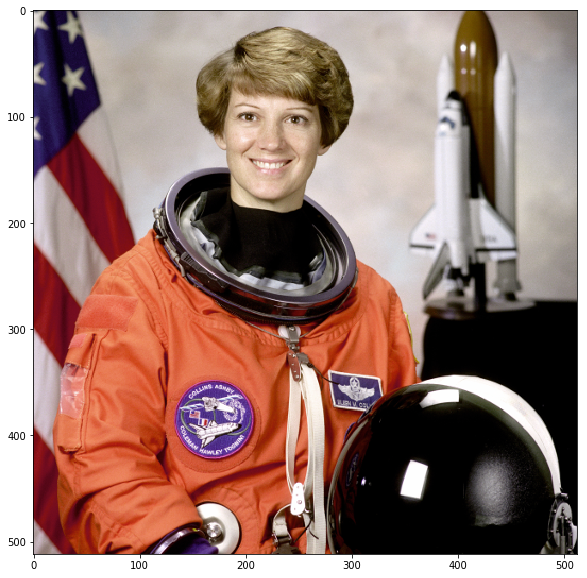

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(image)

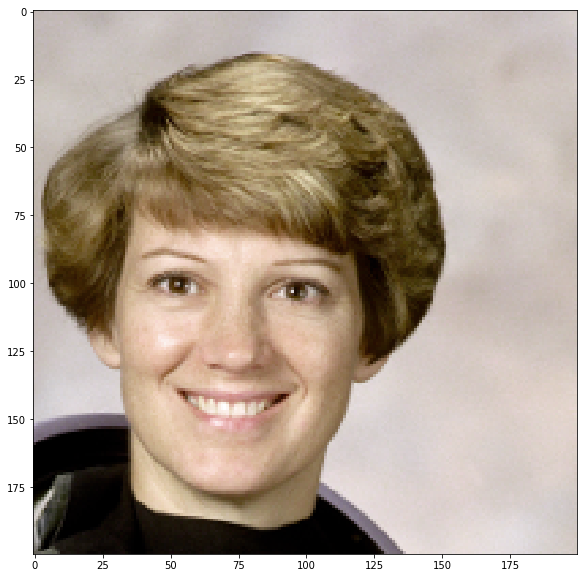

In [4]:
face = image[0:200, 150:350, :]
plt.imshow(face)

In [5]:
#?plt.subplot
#?plt.imshow

In [6]:
# Create context manager for plot size
class Size():
    def __init__(self, x, y=None):
        if y is None:
            y = x
        self.new = [x, y]
        self.orig = plt.rcParams['figure.figsize']

    def __enter__(self):
        plt.rcParams['figure.figsize'] = self.new

    def __exit__(self, *args):
        plt.rcParams['figure.figsize'] = self.orig

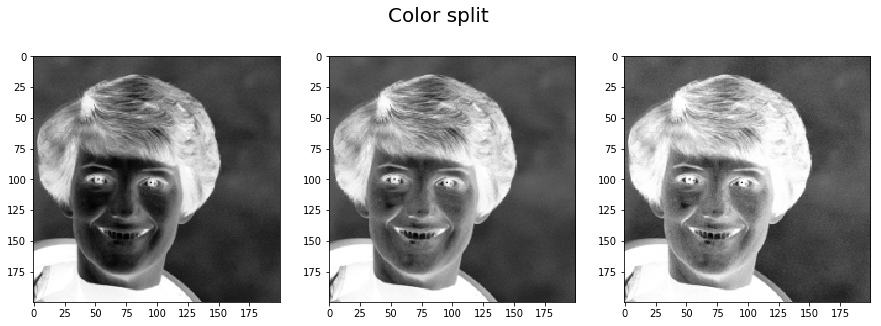

In [7]:
with Size(15, 5):
    plt.suptitle('Color split', fontsize=20)
    for channel in range(3):
        plt.subplot(1, 3, channel + 1)
        plt.imshow(image[0:200, 150:350, channel], cmap='Greys')

In [8]:
#?matplotlib.colors.NoNorm

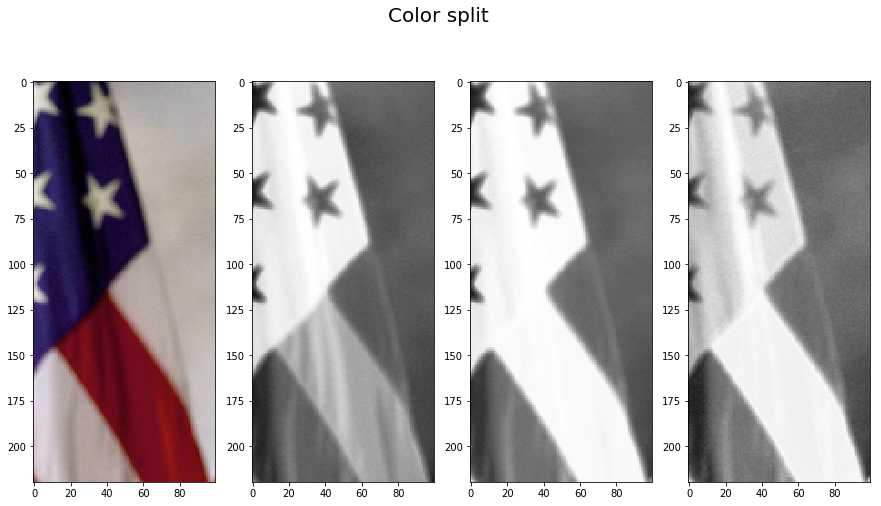

In [9]:
with Size(15, 8):
    plt.suptitle('Color split', fontsize=20)
    plt.subplot(1, 4, 1)
    plt.imshow(image[0:220, 0:100, :])
    for channel in range(3):
        plt.subplot(1, 4, channel + 2)
        plt.imshow(image[0:220, 0:100, channel], cmap='Greys', norm=matplotlib.colors.NoNorm(0, 1))

In [10]:
cube = np.zeros([2,3,4,3], dtype='uint8')
cube[0,0,0,0] = 255 #red
cube[1,1,1,1] = 255 #green
cube[1,2,2,2] = 255 #blue
cube[0,2,3,:] = 255 #white

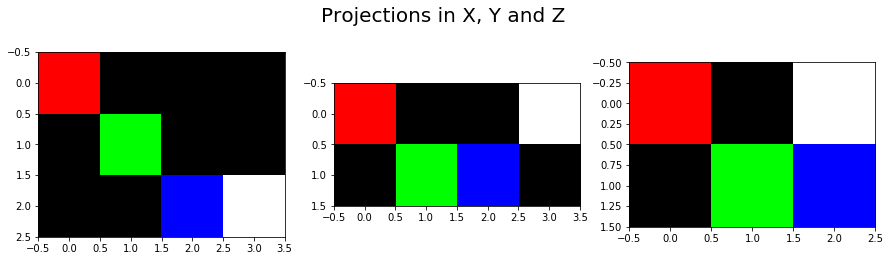

In [11]:
with Size(15, 4):
    plt.suptitle('Projections in X, Y and Z', fontsize=20)
    for dim in range(3):
        proj = cube.max(axis=dim)
        plt.subplot(1, 3, dim + 1)
        plt.imshow(proj)

# IO

In [12]:
import imageio
import skimage

In [13]:
list(imageio.formats)

[<Format TIFF - TIFF format>,
 <Format BMP-PIL - Windows Bitmap>,
 <Format BUFR-PIL - BUFR>,
 <Format CUR-PIL - Windows Cursor>,
 <Format DCX-PIL - Intel DCX>,
 <Format DDS-PIL - DirectDraw Surface>,
 <Format DIB-PIL - Windows Bitmap>,
 <Format EPS-PIL - Encapsulated Postscript>,
 <Format FITS-PIL - FITS>,
 <Format FLI-PIL - Autodesk FLI/FLC Animation>,
 <Format FPX-PIL - FlashPix>,
 <Format FTEX-PIL - Texture File Format (IW2:EOC)>,
 <Format GBR-PIL - GIMP brush file>,
 <Format GIF-PIL - Static and animated gif (Pillow)>,
 <Format GRIB-PIL - GRIB>,
 <Format HDF5-PIL - HDF5>,
 <Format ICNS-PIL - Mac OS icns resource>,
 <Format ICO-PIL - Windows Icon>,
 <Format IM-PIL - IFUNC Image Memory>,
 <Format IMT-PIL - IM Tools>,
 <Format IPTC-PIL - IPTC/NAA>,
 <Format JPEG-PIL - JPEG (ISO 10918)>,
 <Format JPEG2000-PIL - JPEG 2000 (ISO 15444)>,
 <Format MCIDAS-PIL - McIdas area file>,
 <Format MIC-PIL - Microsoft Image Composer>,
 <Format MPO-PIL - MPO (CIPA DC-007)>,
 <Format MSP-PIL - Windows 

In [14]:
jax = imageio.imread('data/jax.jpeg')

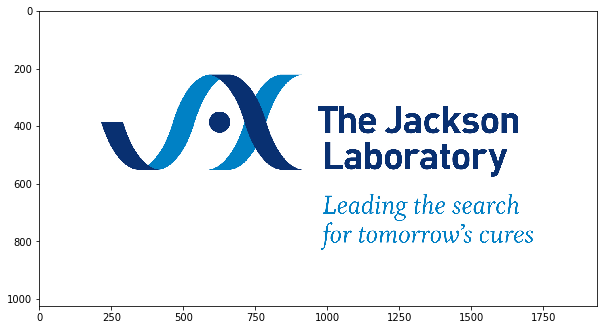

In [15]:
plt.imshow(jax)

In [16]:
jax.shape

(1024, 1938, 3)

In [17]:
jax.dtype

dtype('uint8')

In [18]:
jax.max()

255

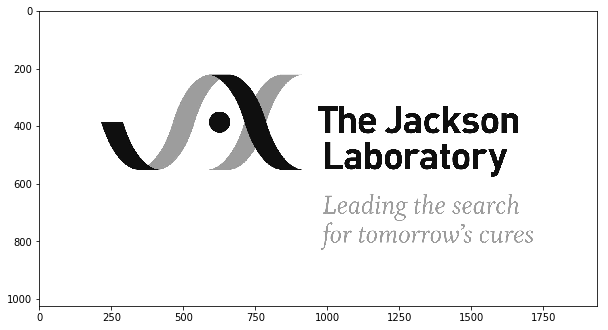

In [19]:
jax_bw = jax.max(axis=2)
plt.imshow(jax_bw, cmap='gray')

In [20]:
jax_bw.shape

(1024, 1938)

In [21]:
jax_bw.T.shape

(1938, 1024)

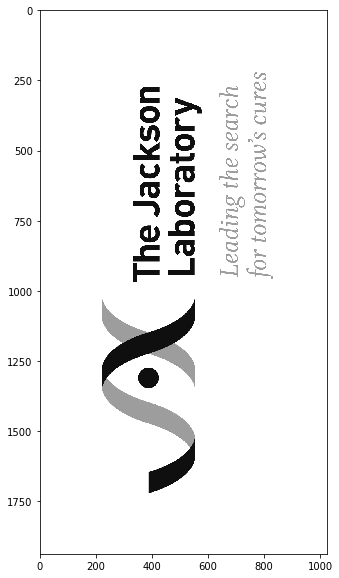

In [22]:
# Transpose and flip
plt.imshow(jax_bw.T[::-1, :], cmap='gray')

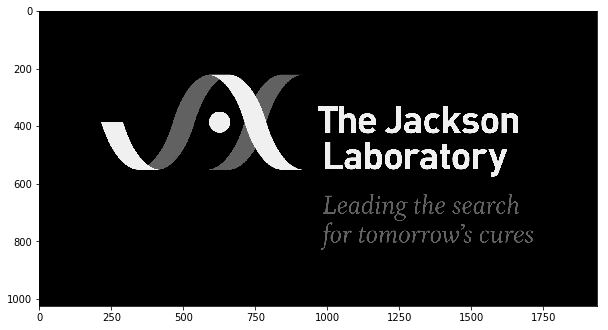

In [23]:
plt.imshow(255 - jax_bw, cmap='gray')

In [24]:
# Save the image.  Ignore the warnings; somebody needs to update their library ;)
imageio.imwrite('jax_inverted.png', 255 - jax_bw)
imageio.imwrite('jax_inverted.tiff', 255 - jax_bw)

/home/omsai/.local/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/omsai/.local/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/omsai/.local/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/omsai/.local/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [25]:
%ls

 0-Background_and_Setup.ipynb           ImPyClass.pptx
 1-Images_are_arrays.ipynb              jax2.jpeg
 2-ImageIO.ipynb                        jax2.tif
'3-Filters and convolutions.ipynb'      jax_inverted.png
'4-Morphology and Segmentation.ipynb'   jax_inverted.tiff
 bf_stack_enhanced_sharped.tif          solutions/
 bf_stack_enhanced.tif                  Untitled.ipynb
 data/


In [26]:
# "Multiple" imread for ND images.
bf = imageio.mimread('data/bf_stack.tif')

In [27]:
type(bf)

list

In [28]:
len(bf)

40

In [29]:
bf[0]

Array([[ 46,  46,  46, ..., 170, 170, 170],
       [ 46,  46,  46, ..., 172, 171, 171],
       [ 46,  46,  46, ..., 172, 172, 171],
       ...,
       [ 57,  58,  58, ..., 126, 126, 125],
       [ 57,  58,  58, ..., 125, 124, 124],
       [ 56,  57,  58, ..., 122, 123, 122]], dtype=uint8)

In [30]:
bf[0].ndim

2

In [31]:
bf_vol = np.dstack(bf)

In [32]:
help(np.dstack)

Help on function dstack in module numpy:

dstack(tup)
    Stack arrays in sequence depth wise (along third axis).
    
    This is equivalent to concatenation along the third axis after 2-D arrays
    of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
    `(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
    `dsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of arrays
        The arrays must have the same shape along all but the third axis.
        1-D or 2-D arrays must have the same shape.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays, will be at least 3-D.
    
    See Al

In [33]:
# 3D grayscale image, not color!
bf_vol.shape

(442, 422, 40)

In [34]:
bf_vol

array([[[ 46,  45,  45, ...,  38,  38,  37],
        [ 46,  45,  45, ...,  38,  38,  37],
        [ 46,  46,  45, ...,  38,  38,  37],
        ...,
        [170, 171, 171, ..., 173, 173, 175],
        [170, 171, 171, ..., 173, 172, 175],
        [170, 171, 170, ..., 172, 172, 175]],

       [[ 46,  45,  46, ...,  38,  38,  38],
        [ 46,  46,  46, ...,  38,  38,  38],
        [ 46,  46,  46, ...,  38,  38,  38],
        ...,
        [172, 172, 172, ..., 173, 172, 176],
        [171, 172, 171, ..., 173, 173, 175],
        [171, 171, 170, ..., 172, 172, 175]],

       [[ 46,  46,  46, ...,  39,  39,  39],
        [ 46,  46,  46, ...,  39,  39,  38],
        [ 46,  46,  46, ...,  39,  39,  38],
        ...,
        [172, 172, 172, ..., 174, 174, 175],
        [172, 172, 171, ..., 174, 174, 176],
        [171, 171, 171, ..., 173, 173, 175]],

       ...,

       [[ 57,  57,  58, ...,  56,  55,  56],
        [ 58,  58,  58, ...,  56,  55,  56],
        [ 58,  58,  59, ...,  56,  56,  57

# IO (continued)

Empty colon is optional when cropping images.  If you leave off a trailing dimension it is included.

In [35]:
from PIL import Image, ImageEnhance

In [36]:
bf_vol.shape

(442, 422, 40)

In [37]:
%ls data/

bf_stack.tif  jax.jpeg


In [38]:
bf2 = Image.open('data/bf_stack.tif')

In [39]:
plt.rcParams['figure.figsize'] = [6, 6]

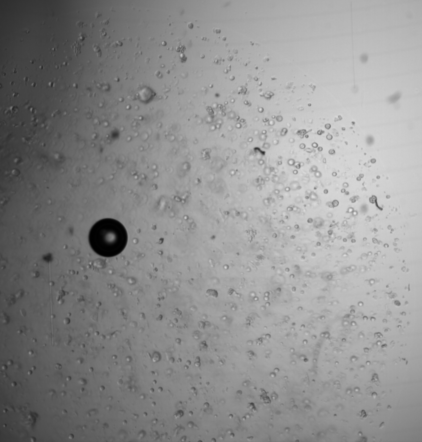

In [40]:
# With the Python Imaging Library,
# we don't need to use imshow anymore!
bf2

In [41]:
bf2.n_frames

40

In [42]:
bf2.seek(39)

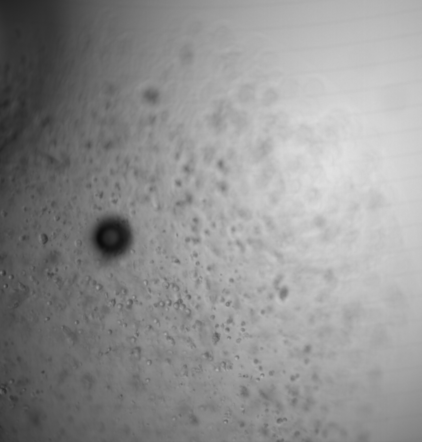

In [43]:
bf2

In [44]:
bf2.seek(0)

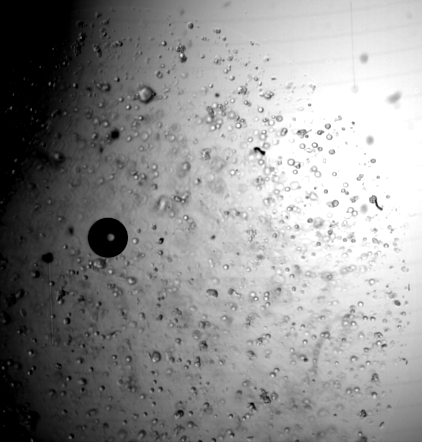

In [45]:
ImageEnhance.Contrast(bf2).enhance(2)

In [46]:
bf2_enhanced = []
for frame in range(40):
    bf2.seek(frame)
    enhanced = ImageEnhance.Contrast(bf2).enhance(2)
    bf2_enhanced.append(enhanced)

In [47]:
type(bf2_enhanced)

list

In [48]:
bf2_enhanced[0].save('bf_stack_enhanced.tif',
                     # There's going to be more stuff coming.
                     save_all=True,
                     # Here is all the other things.
                     append_images=bf2_enhanced[1:])

In [49]:
%ls -l bf_stack_enhanced.tif

-rw-r--r-- 1 omsai omsai 7466240 Feb  1 15:43 bf_stack_enhanced.tif


In [50]:
#%magic

In [51]:
! apt search hello

Sorting... Done
Full Text Search... Done
ace/green 0.0.5-3 amd64
  HTML template engine for Go (command-line tool)

elpa-find-file-in-project/green 5.7.1-1 all
  quick access to project files in Emacs

gettext-doc/green 0.19.8.1-9 all
  Documentation for GNU gettext

golang-github-yosssi-ace-dev/green 0.0.5-3 all
  HTML template engine for Go (library package)

grhino/green 0.16.1-4 amd64
  othello/reversi boardgame

grhino-data/green 0.16.1-4 all
  othello/reversi boardgame - data-files

gtkboard/green 0.11pre0+cvs.2003.11.02-9 amd64
  many board games in one program

hello/green 2.10-1+b1 amd64
  example package based on GNU hello

hello-traditional/green 2.10-3+b1 amd64
  example package not using any helper package

iagno/green 1:3.30.0-2 amd64
  popular Othello game for GNOME

irssi-scripts/green 20181120 all
  collection of scripts for irssi

jester/green 1.0-13 amd64
  board game similar to Othello

junior-system/green 1.26pureos1 all
  Debian Jr. System tools

libedlib-dev/gree

In [52]:
#%apt

## Exercise solution - sharpness enhancement

In [53]:
stack = Image.open('bf_stack_enhanced.tif')

In [54]:
stack.n_frames

40

In [55]:
sharped = []
for frame in range(40):
    stack.seek(frame)
    new_frame = ImageEnhance.Sharpness(stack).enhance(3)
    sharped.append(new_frame)

In [56]:
sharped[0].save('bf_stack_enhanced_sharped.tif',
                save_all=True,
                append_images=sharped[1:])

In [57]:
%ls -l bf_st*

-rw-r--r-- 1 omsai omsai 7466240 Feb  1 15:43 bf_stack_enhanced_sharped.tif
-rw-r--r-- 1 omsai omsai 7466240 Feb  1 15:43 bf_stack_enhanced.tif


In [58]:
import sys

sys.getsizeof(sharped)

432

# Filters and Convolutions

[Prewitt](https://en.wikipedia.org/wiki/Prewitt_operator) convolution kernel for detecting image edges:

    -1 0 1
    -1 0 1
    -1 0 1

In [59]:
import matplotlib
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

In [60]:
jax = Image.open('data/jax.jpeg')

jax_thumb = jax.copy()
jax.close()
jax_thumb.thumbnail([500, 500])

In [61]:
jax_gray = ImageOps.invert(jax_thumb.convert('L'))

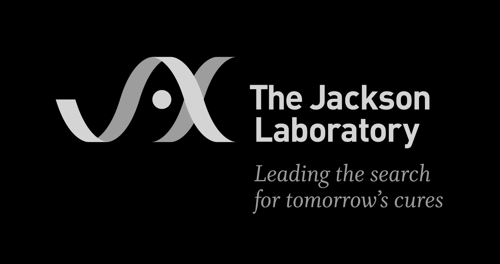

In [62]:
jax_gray

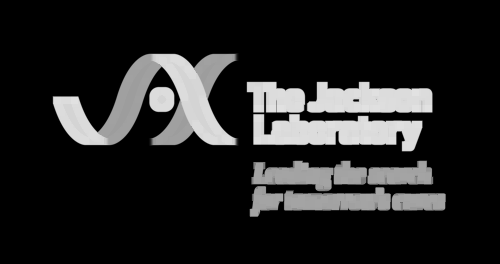

In [63]:
jax_gray.filter(ImageFilter.MaxFilter(7))

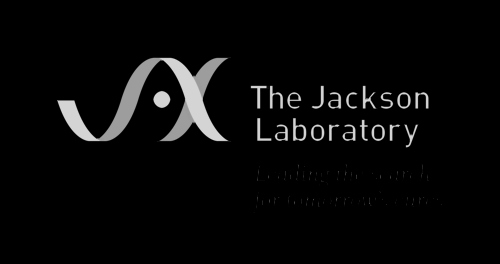

In [64]:
jax_gray.filter(ImageFilter.MinFilter(3))

In [65]:
letter_l = np.array(jax_gray.crop([253, 130, 265, 145]))
letter_l

array([[  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 208,  32,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 212, 210, 140, 124, 124, 124],
       [  0,   0,   0, 140, 219, 212, 212, 212, 219, 220, 220, 220],
       [  0,   0,   0, 140, 219, 212, 212, 212, 212, 212, 212, 212],
       [  0,   0,   0, 144, 224, 219, 219, 219, 219, 219, 219, 219],
       [  0,   0,   0, 100, 156, 150, 150, 150, 150, 150, 150, 150],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  

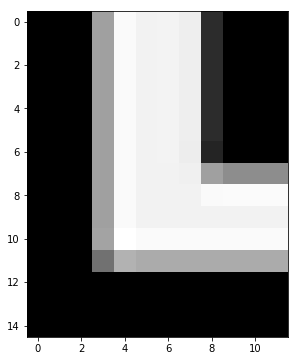

In [66]:
plt.imshow(letter_l, cmap='gray')

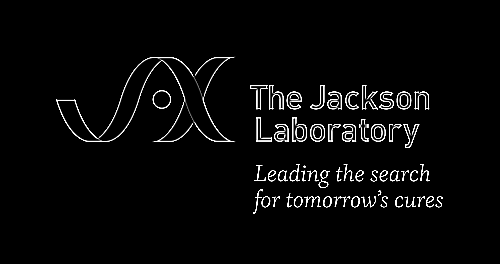

In [67]:
# Make our own filter!
#
# Discrete approximaion of the Laplacian.
# What is happening to change in brigtness in any direction?
# If there is any change, make the image brighter.
# Very common edge detector.
kernel = (-1, -1, -1,
          -1,  8, -1,
          -1, -1, -1)
jax_edges = jax_gray.filter(ImageFilter.Kernel(size=(3,3), kernel=kernel, scale=1, offset=0))
jax_edges

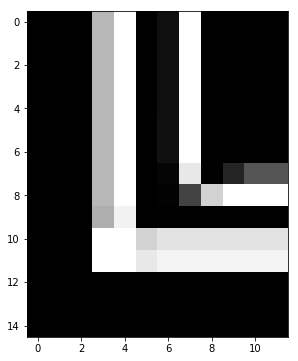

In [68]:
hollow_L = np.array(jax_edges.crop([253, 130, 265, 145]))
plt.imshow(hollow_L, cmap='gray')

Downside of this edge filter is it amplifies edges and noise.
JAX logo is nice because it was made in Illustrator.
But for microscopy images we would first need a median filter.

In [69]:
from skimage import io, color, util, filters, transform

/home/omsai/.local/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/omsai/.local/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/omsai/.local/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(264, 500, 3)

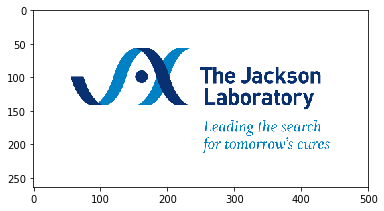

In [70]:
jax2 = io.imread('data/jax.jpeg')

jax2 = transform.rescale(jax2, .258)
plt.imshow(jax2);
jax2.shape

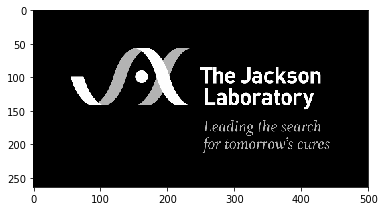

In [71]:
# scikit-image has many functions similar to PIL, they just work a little differently
jax2_gray = color.rgb2gray(jax2)
jax2_gray = util.invert(jax2_gray)
plt.imshow(jax2_gray, cmap='gray');

In [72]:
jax2_edges = filters.laplace(jax2_gray)

In [73]:
import functools

imshow = functools.partial(plt.imshow, cmap='gray')

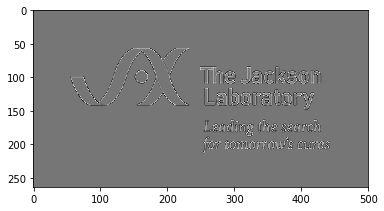

In [74]:
imshow(jax2_edges)

In [75]:
jax2_edges.max()

2.3388163173976064

In [76]:
jax2_edges.min()

-2.009116499809836

In [77]:
# We rescale to max, and use abs() to invert the negative value.

#jax2_edges -= jax2_edges.min()  # Offset the min
#jax2_edges = jax2_edges * (255 / (abs(jax2_edges)).max())
#jax2_edges.min(), jax2_edges.max()

In [78]:
help(transform.rescale)

Help on function rescale in module skimage.transform._warps:

rescale(image, scale, order=1, mode=None, cval=0, clip=True, preserve_range=False, multichannel=None, anti_aliasing=None, anti_aliasing_sigma=None)
    Scale image by a certain factor.
    
    Performs interpolation to up-scale or down-scale images. Note that anti-
    aliasing should be enabled when down-sizing images to avoid aliasing
    artifacts. For down-sampling N-dimensional images with an integer factor
    also see `skimage.transform.downscale_local_mean`.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    scale : {float, tuple of floats}
        Scale factors. Separate scale factors can be defined as
        `(rows, cols[, ...][, dim])`.
    
    Returns
    -------
    scaled : ndarray
        Scaled version of the input.
    
    Other parameters
    ----------------
    order : int, optional
        The order of the spline interpolation, default is 1. The order has to
        be in

In [79]:
jax2_scaled = transform.rescale(jax2_edges, 1, preserve_range=True)

In [80]:
jax2_scaled.min(), jax2_scaled.max()

(-2.009116499809836, 2.3388163173976064)

In [81]:
jax2_int = jax2_scaled.astype('uint8')

In [82]:
jax2_int.min(), jax2_int.max()

(0, 255)

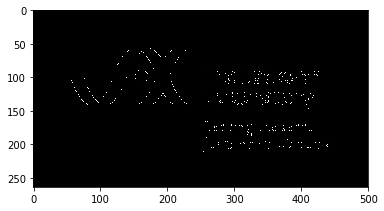

In [83]:
imshow(jax2_int)

In [84]:
jax2_scaled.min()

-2.009116499809836

## Exercise

In [85]:
arr = data.astronaut()

In [86]:
type(arr)

numpy.ndarray

In [87]:
im_orig = Image.fromarray(arr)

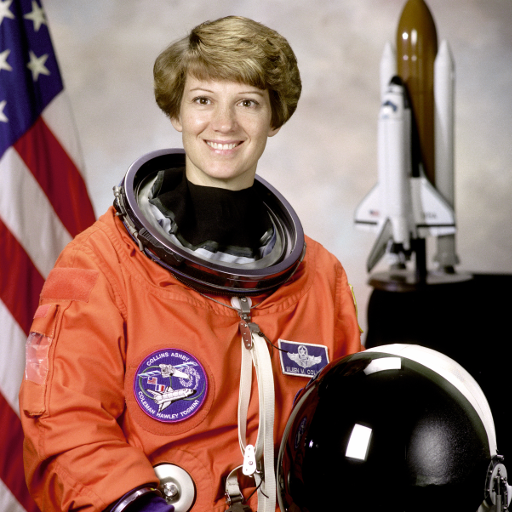

In [88]:
im_orig

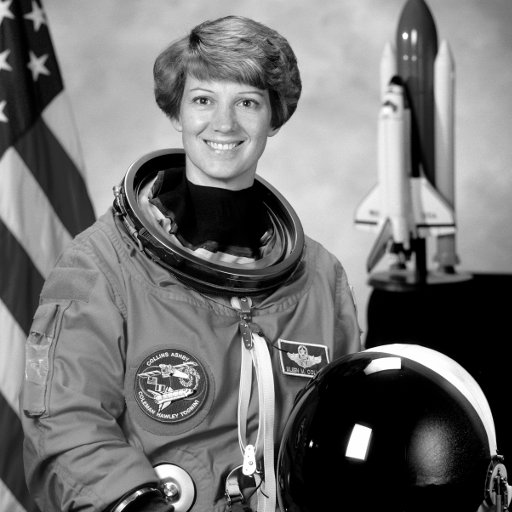

In [ ]:
im_gray = ImageOps.grayscale(im_orig)
im_gray

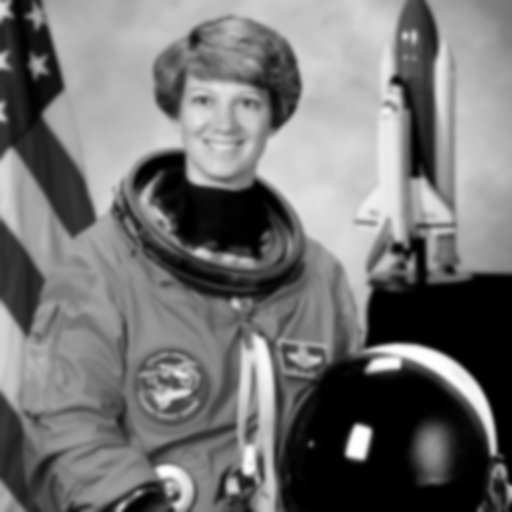

In [ ]:
im_blurred = im_gray.filter(ImageFilter.GaussianBlur(2))
im_blurred

In [ ]:
arr_inv = util.invert(np.array(im_blurred))
arr_edge = filters.prewitt(arr_inv)
arr_edge.min(), arr_edge.max()

(0.0, 0.24881452450867117)

In [ ]:
def to_image(arr):
    return Image.fromarray((arr * 255).astype('uint8'))

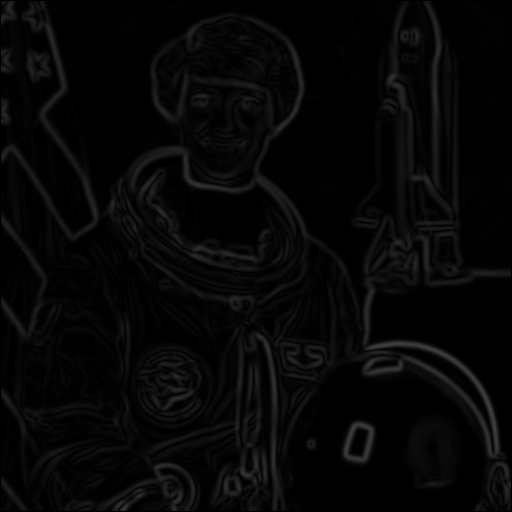

In [ ]:
im_edge = to_image(arr_edge)
im_edge

0 63


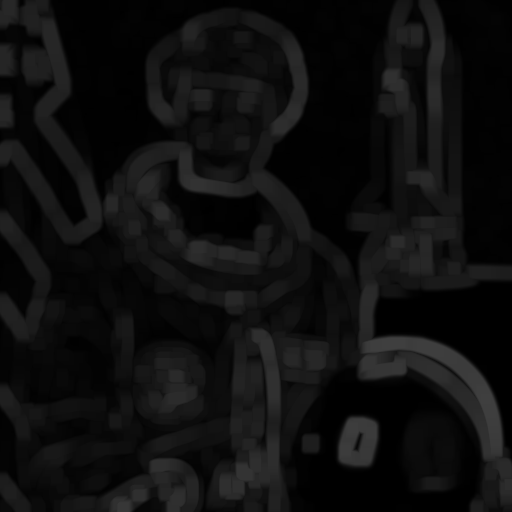

In [ ]:
from skimage import morphology
n = 10
thick_edges = morphology.dilation(np.array(im_edge), selem=np.ones([n, n]))
print(thick_edges.min(), thick_edges.max())
im_thick_edges = Image.fromarray(thick_edges)
im_thick_edges

# Morphology and Segmentation

In [ ]:
from skimage import io, color, util, filters, transform, morphology, measure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

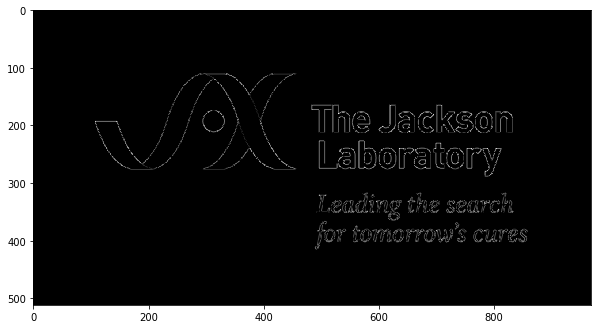

In [ ]:
# Lets get our edge map back (see Part 3 for explanation of this code)
jax2 = io.imread('data/jax.jpeg')
jax2 = transform.rescale(jax2, .5)
jax2_gray = color.rgb2gray(jax2)
jax2_gray = util.invert(jax2_gray)
jax2_edges = filters.laplace(jax2_gray)

jax2_edges = abs(jax2_edges*(255/jax2_edges.max()))
jax2_edges = jax2_edges.astype('uint8')

matplotlib.rcParams['figure.figsize'] = [10.0, 10.0] 
plt.imshow(jax2_edges, cmap='gray');

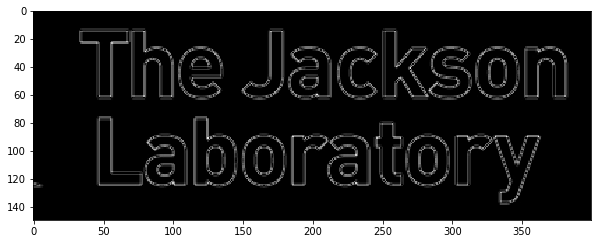

In [ ]:
plt.imshow(jax2_edges[150:300, 450:850], cmap='gray');

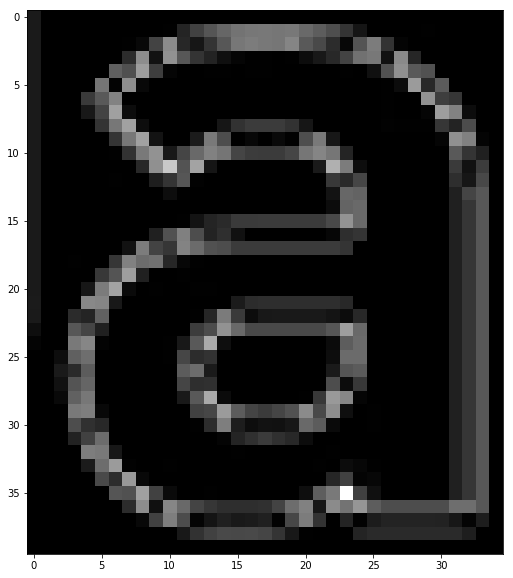

In [ ]:
imshow(jax2_edges[175:215, 630:665])

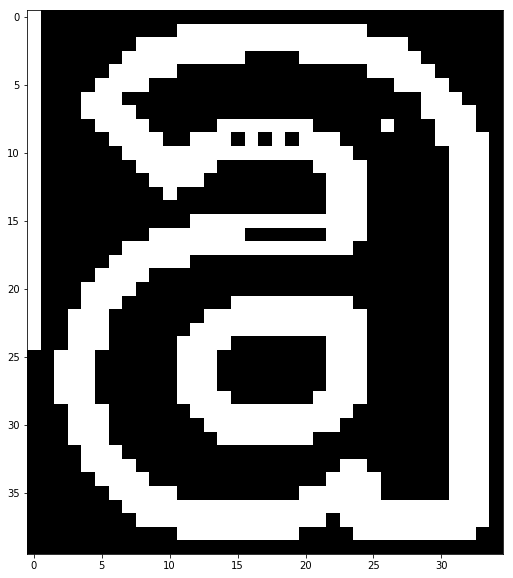

In [ ]:
jax_outline = jax2_edges > 1
a = (slice(175, 215), slice(630, 665),)
imshow(jax_outline[a])

In [ ]:
selem = morphology.square(2)
selem

array([[1, 1],
       [1, 1]], dtype=uint8)

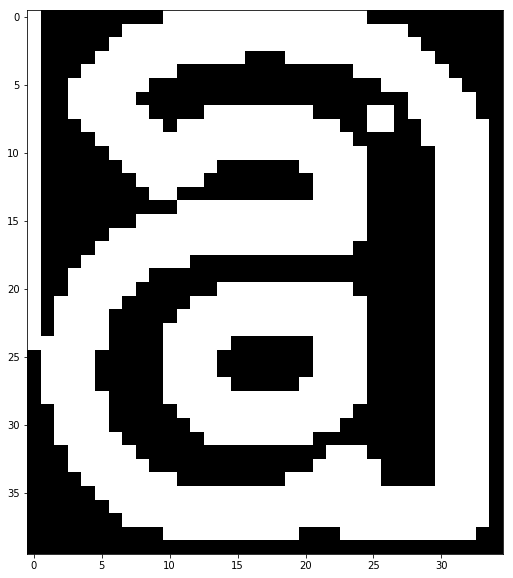

In [ ]:
jax_outline_dilate = morphology.binary_dilation(jax_outline, selem)
imshow(jax_outline_dilate[a])

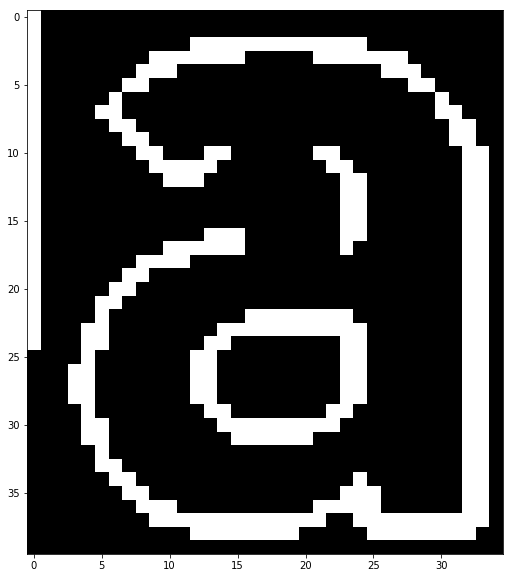

In [ ]:
jax_outline_erode = morphology.binary_erosion(jax_outline, selem)
imshow(jax_outline_erode[a])

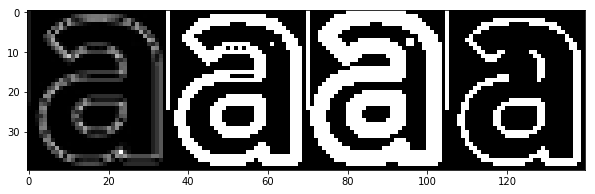

In [ ]:
imshow(np.hstack([jax2_edges[a] / jax2_edges[a].max(),
                  jax_outline[a], jax_outline_dilate[a], jax_outline_erode[a]]))

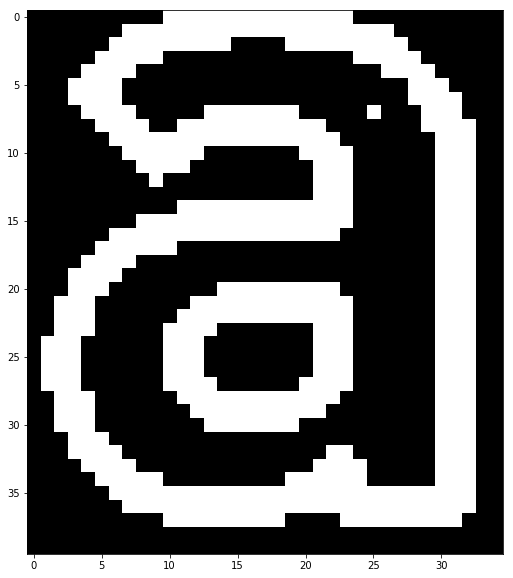

In [ ]:
jax_dilate_erode = morphology.erosion(jax_outline_dilate, selem)
imshow(jax_dilate_erode[a])

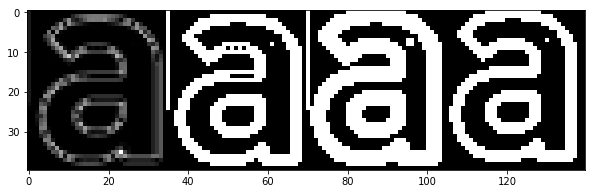

In [ ]:
imshow(np.hstack([jax2_edges[a] / jax2_edges[a].max(),
                  jax_outline[a], jax_outline_dilate[a], jax_dilate_erode[a]]))

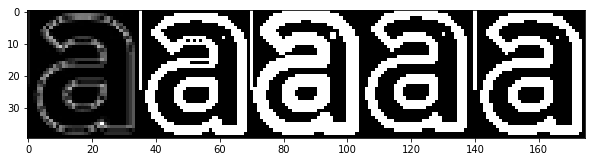

In [ ]:
jax_closed = morphology.closing(jax_outline, selem)
imshow(np.hstack([jax2_edges[a] / jax2_edges[a].max(),
                  jax_outline[a], jax_outline_dilate[a], jax_dilate_erode[a], jax_closed[a]]))

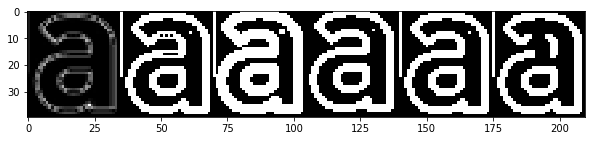

In [ ]:
jax_opening = morphology.opening(jax_outline, selem)
imshow(np.hstack([jax2_edges[a] / jax2_edges[a].max(),
                  jax_outline[a], jax_outline_dilate[a], jax_dilate_erode[a], jax_closed[a],
                  jax_opening[a]]))

In [ ]:
tj = slice(150, 225), slice(450, 850)

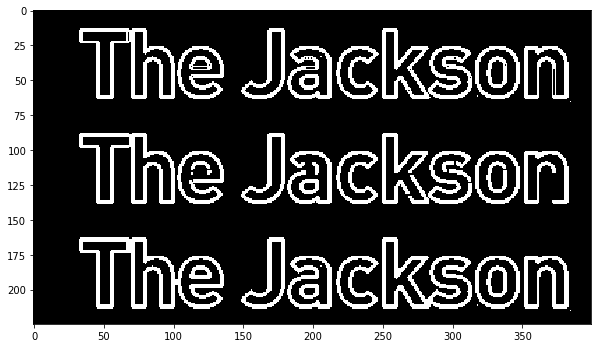

In [ ]:
imshow(np.vstack([jax_outline[tj],
                  jax_opening[tj],
                  jax_closed[tj]]))

In [ ]:
jax_skeleton = morphology.skeletonize(jax_closed)

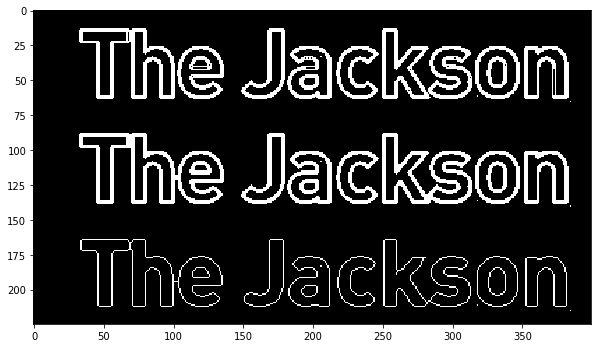

In [ ]:
imshow(np.vstack([jax_outline[tj],
                  jax_closed[tj],
                  jax_skeleton[tj]]))

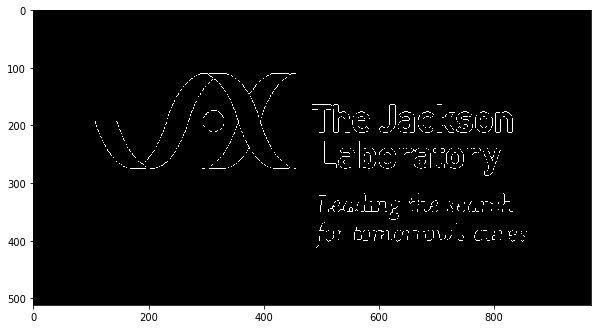

In [ ]:
# Display artifacts from single pixel aliasing; the image is actually fine.
imshow(jax_skeleton)

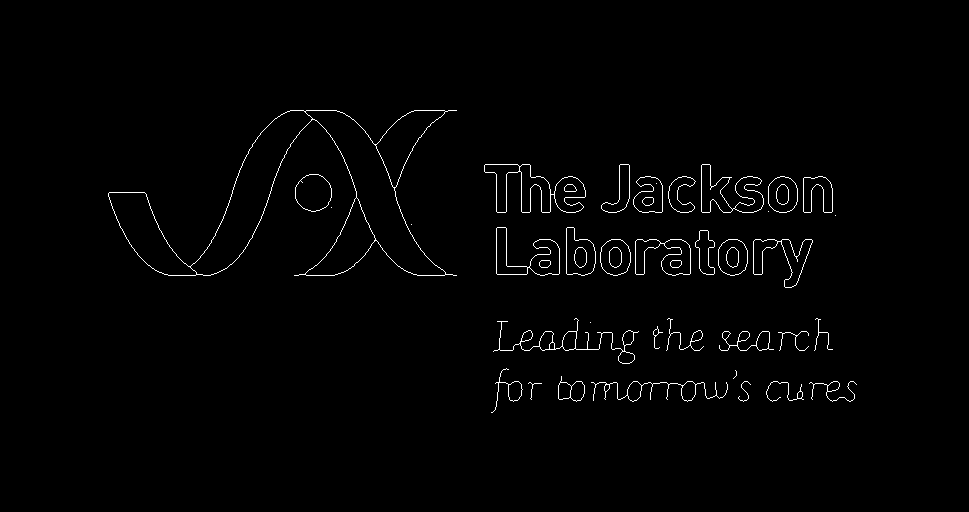

In [ ]:
# PIL is clearer because it preserves scaling.
to_image(jax_skeleton)

In [ ]:
jax_border = morphology.dilation(morphology.dilation(jax_skeleton, selem), selem)

In [ ]:
jax_color_outline = jax2.copy()

In [ ]:
for channel in range(3):
    jax_color_outline[:, :, channel] = jax_border * jax2[:, :, channel]

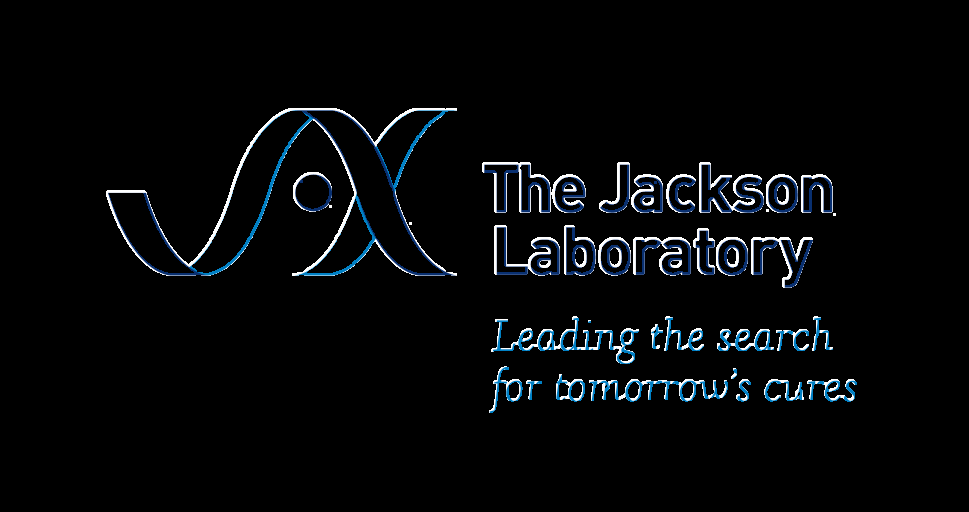

In [ ]:
to_image(jax_color_outline)

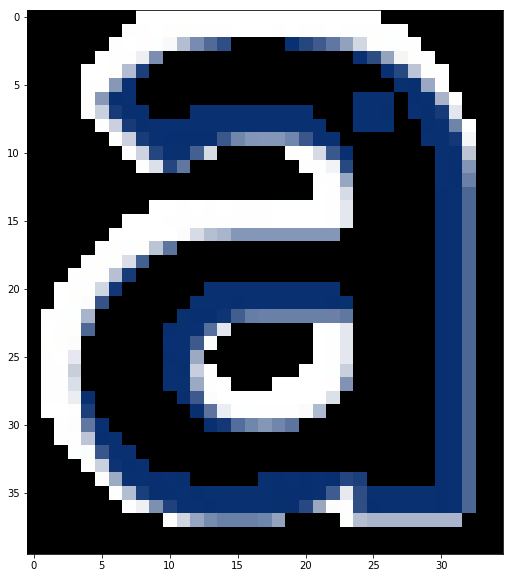

In [ ]:
imshow(jax_color_outline[a])

## Finding objects

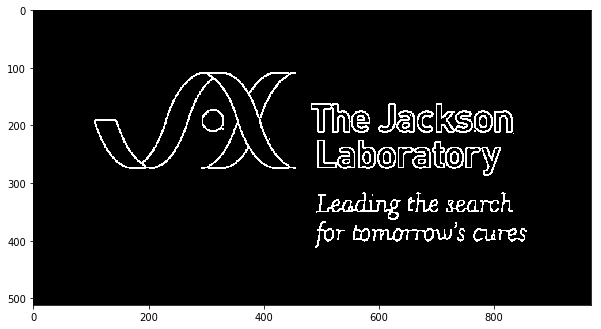

In [ ]:
imshow(jax_border)

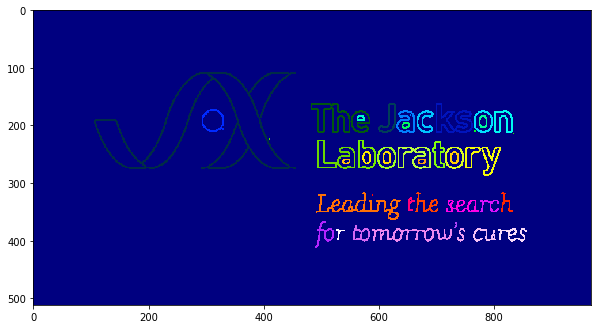

In [ ]:
jax_label = measure.label(jax_border)
plt.imshow(jax_label, cmap='gist_ncar')

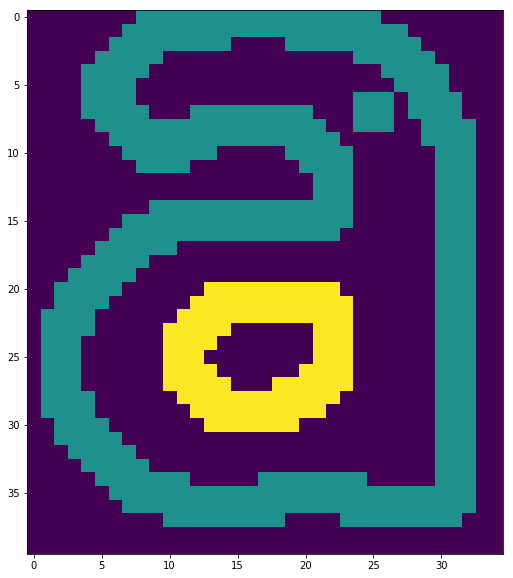

In [ ]:
plt.imshow(jax_label[a])

In [ ]:
n = jax_label.max()
n

42

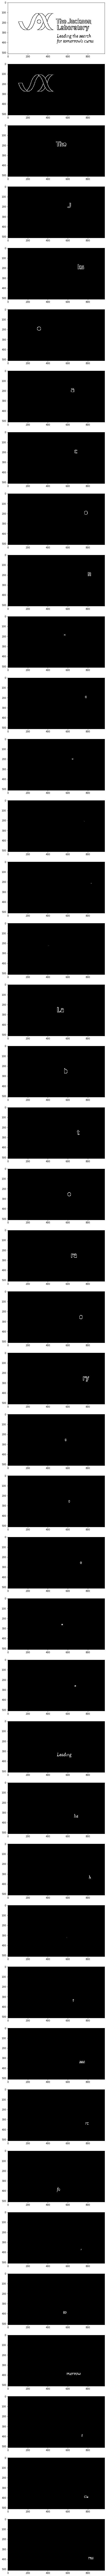

In [ ]:
with Size(10, 200):
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        imshow(jax_label == i)

## Exercise: count coins

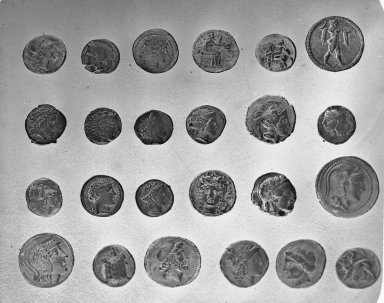

In [ ]:
coins = data.coins()
to_image(coins)

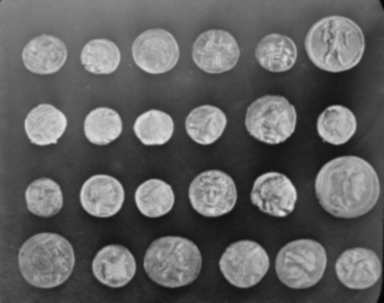

In [ ]:
to_image(filters.gaussian(coins))

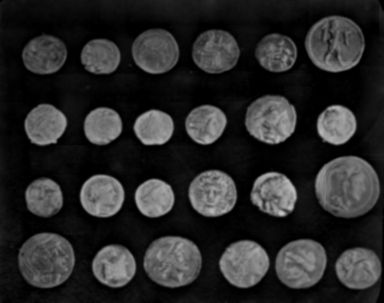

In [ ]:
import scipy.ndimage as nd

ndim = [50] * 2
bg = nd.white_tophat(filters.gaussian(coins), size=ndim, structure=np.ones(ndim))
to_image(bg)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 720x1080 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4d2d870f0>,
       dtype=object))

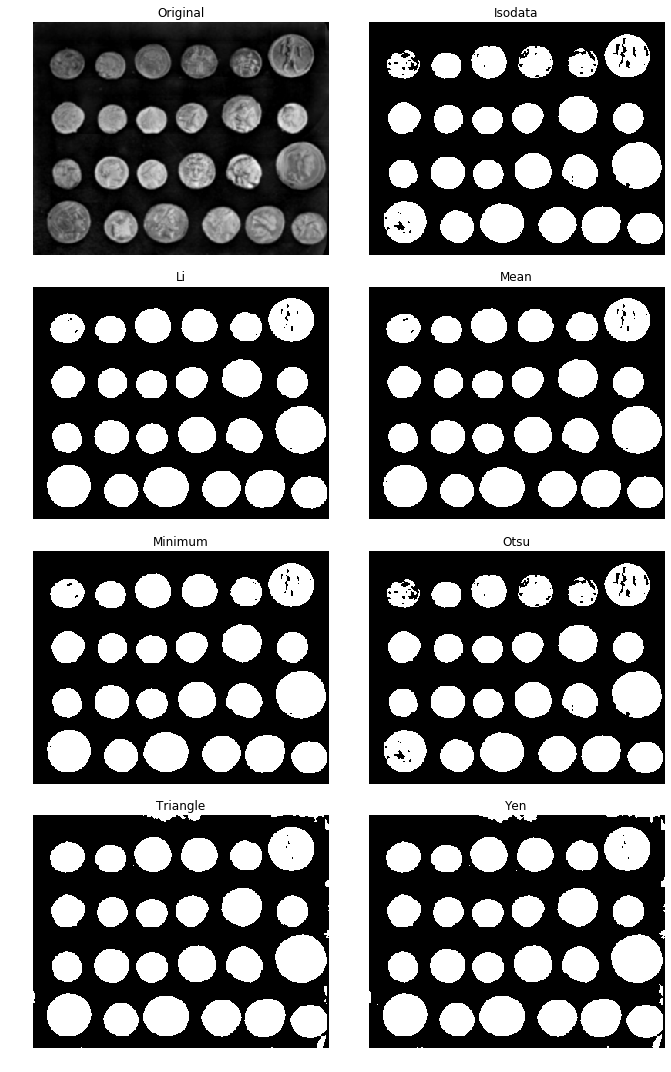

In [ ]:
filters.try_all_threshold(bg, figsize=[10, 15])

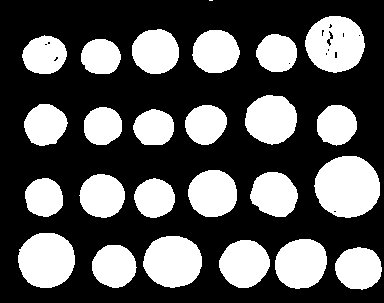

In [ ]:
mask = bg > filters.threshold_li(bg)
to_image(mask)

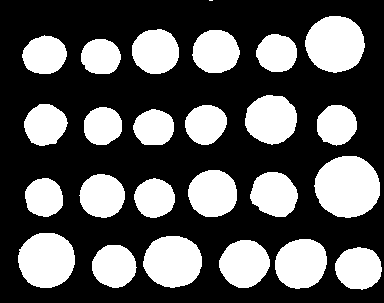

In [ ]:
mask_filled = morphology.remove_small_holes(mask)
to_image(mask_filled)

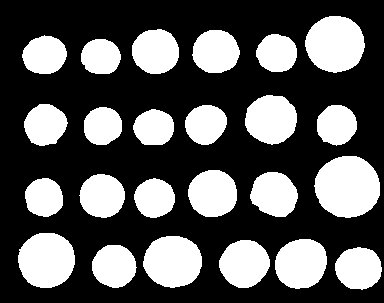

In [ ]:
mask_coins = morphology.remove_small_objects(mask_filled)
to_image(mask_coins)

In [ ]:
label = measure.label(mask_coins)
print(label.max())
plt.imshow(label, cmap='gist_ncar')

24
